# Step 1: Import Pandas to use the data

In [2]:
import pandas as pd

# Step 2: Create a dataframe to access the dataset

In [3]:
dataframe = pd.read_csv(r"reviews.csv")

# Step 3: Perform all kinds of operations on this dataset using the standard methods

In [4]:
dataframe.head()

,Review,Sentiment
0,This product exceeded my expectations! It's hi...,Positive
1,"The product was decent. It worked fine, but it...",Neutral
2,I had a terrible experience with this company....,Negative
3,It's an okay product. Nothing to write home ab...,Neutral
4,Disappointed with the product. It didn't meet ...,Negative


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     386 non-null    object
 1   Sentiment  386 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


*Extract the number of reviews pertaining to each class.*

In [6]:
positive_reviews = dataframe[dataframe["Sentiment"] == "Positive"].shape[0]
negative_reviews = dataframe[dataframe["Sentiment"] == "Negative"].shape[0]
neutral_reviews = dataframe[dataframe["Sentiment"] == "Neutral"].shape[0]
print("Number of Positive Reviews:", positive_reviews)
print("Number of Negative Reviews:", negative_reviews)
print("Number of Neutral Reviews:", neutral_reviews)

Number of Positive Reviews: 129
Number of Negative Reviews: 129
Number of Neutral Reviews: 128


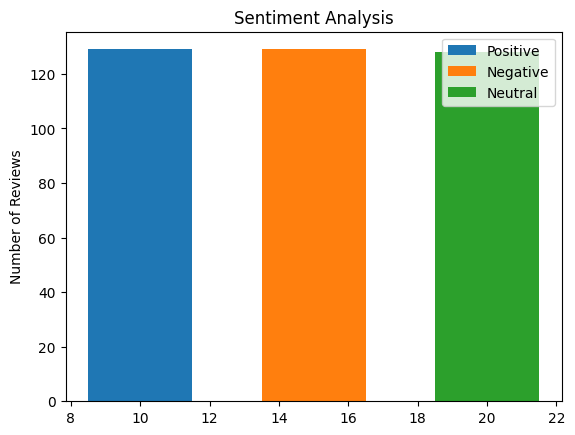

In [7]:
# Now we will plot the data
import matplotlib.pyplot as plt

plt.bar(10, positive_reviews, 3, label="Positive")
plt.bar(15, negative_reviews, 3, label="Negative")
plt.bar(20, neutral_reviews, 3, label="Neutral")
plt.legend()
plt.ylabel("Number of Reviews")
plt.title("Sentiment Analysis")
plt.show()

In [8]:
# Now we will clean the data
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

dataframe["Review"] = dataframe["Review"].apply(clean_text)
dataframe.head()

,Review,Sentiment
0,this product exceeded my expectations its high...,Positive
1,the product was decent it worked fine but it w...,Neutral
2,i had a terrible experience with this company ...,Negative
3,its an okay product nothing to write home about,Neutral
4,disappointed with the product it didnt meet my...,Negative


In [9]:
# Now we will split the data into training and testing data
from sklearn.model_selection import train_test_split

X = dataframe["Review"]
y = dataframe["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Now we will convert the text data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [11]:
# Now we will use the Naive Bayes algorithm to train the model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train);

In [12]:
# Now we will evaluate the model
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9871794871794872


In [13]:
# Now we will test the model
def test_model(input_text):
    input_text = vectorizer.transform([input_text])
    prediction = model.predict(input_text)
    return prediction[0]

In [17]:
test_model("This product is amazing!")

'Positive'

In [18]:
test_model("This product is terrible!")

'Negative'